<a href="https://colab.research.google.com/github/Christaynium/Stat170/blob/main/CS167Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #6
Name: Chris Cavan


## Problem Description:
Describe the problem you are going to attempt to solve.
Describe the tools used and your approach. 

Based on a set of x-rays images we are looking to predict whether we can identify whether a patient has pneumonia or not based only off a image of an x-ray. Using tensor flow and keras we create our base model with the sigmoid activation function, with regions of 3X3 in an image, 32 feature maps, 2 convolution layers, 2 pooled layers and an epoch of 6. We will then use a tuned CNN model to see if we can improve upon that model. In the tuned model dropout layers, aditional kernels were added and features increased.

In [21]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# attempt to get GPU reserved
# In Google Colab, select Runtime -> Change runtime type
# If possible, select GPU and SAVE
# If not possible, OK. Computations may take a bit longer
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [23]:
import keras
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [24]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# import the libraries
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

<hr>

# Example code for Chest X-Ray

In [26]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/chest_xray/train' #5216 images
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/chest_xray/test'   #624 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


In [27]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 5235 images belonging to 2 classes.
Found 636 images belonging to 2 classes.


In [81]:
# Baseline CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # flatten convolutional layer so ica go into a fully-connected layer
model.add(Dense(32, activation='sigmoid')) #Fully-connected layer
model.add(Dense(1,activation='sigmoid')) 

#compile model
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [94]:
# train baseline model
training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=15,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

Epoch 1/15
164/164 [==============================] - 14s 87ms/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 1.0865 - val_accuracy: 0.7296
Epoch 2/15
164/164 [==============================] - 14s 86ms/step - loss: 0.0696 - accuracy: 0.9742 - val_loss: 0.9490 - val_accuracy: 0.7453
Epoch 3/15
164/164 [==============================] - 14s 86ms/step - loss: 0.0707 - accuracy: 0.9742 - val_loss: 0.9550 - val_accuracy: 0.7610
Epoch 4/15
164/164 [==============================] - 15s 89ms/step - loss: 0.0661 - accuracy: 0.9773 - val_loss: 0.7554 - val_accuracy: 0.7909
Epoch 5/15
164/164 [==============================] - 15s 88ms/step - loss: 0.0659 - accuracy: 0.9771 - val_loss: 1.0340 - val_accuracy: 0.7374
Epoch 6/15
164/164 [==============================] - 14s 87ms/step - loss: 0.0669 - accuracy: 0.9773 - val_loss: 0.8420 - val_accuracy: 0.7767
Epoch 7/15
164/164 [==============================] - 14s 87ms/step - loss: 0.0672 - accuracy: 0.9769 - val_loss: 1.0054 - val_accuracy:

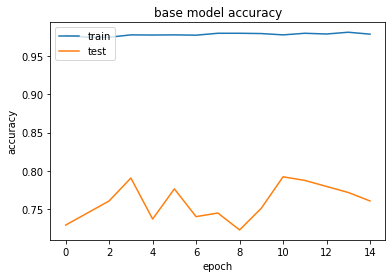

In [95]:
#plot of baseline model

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
from keras.layers import Dropout

# tuned CNN
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(Dropout(.2,(64,)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Dropout(.2,(64,)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Dropout(.2,(64,)))

model2.add(Flatten())
model2.add(Dense(64, activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid')) 

#compile model
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [118]:
# train tuned model
training_results2 = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=5,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

Epoch 1/5
164/164 [==============================] - 14s 85ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.8627 - val_accuracy: 0.7940
Epoch 2/5
164/164 [==============================] - 14s 86ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 1.1125 - val_accuracy: 0.7531
Epoch 3/5
164/164 [==============================] - 14s 85ms/step - loss: 0.0203 - accuracy: 0.9947 - val_loss: 1.1080 - val_accuracy: 0.7563
Epoch 4/5
164/164 [==============================] - 14s 85ms/step - loss: 0.0164 - accuracy: 0.9973 - val_loss: 0.8637 - val_accuracy: 0.8019
Epoch 5/5
164/164 [==============================] - 15s 89ms/step - loss: 0.0161 - accuracy: 0.9968 - val_loss: 1.0611 - val_accuracy: 0.7704


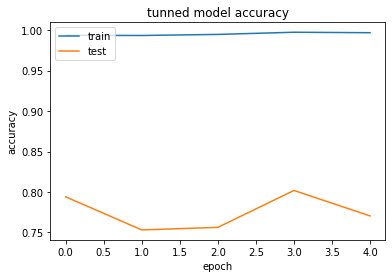

In [119]:
#plot of baseline model

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('tunned model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion<br>
The addition of the dropout layers and the increse of features, kernels, and pooling layers, appears to only slightly increase the accuracy to be more consistant or about the same. There is overfitting as the model's accuracy is almost perfect in the training set, but only between .75 and at max about a bit over .8 accuracy at best on the test set, not much better over the base model.
